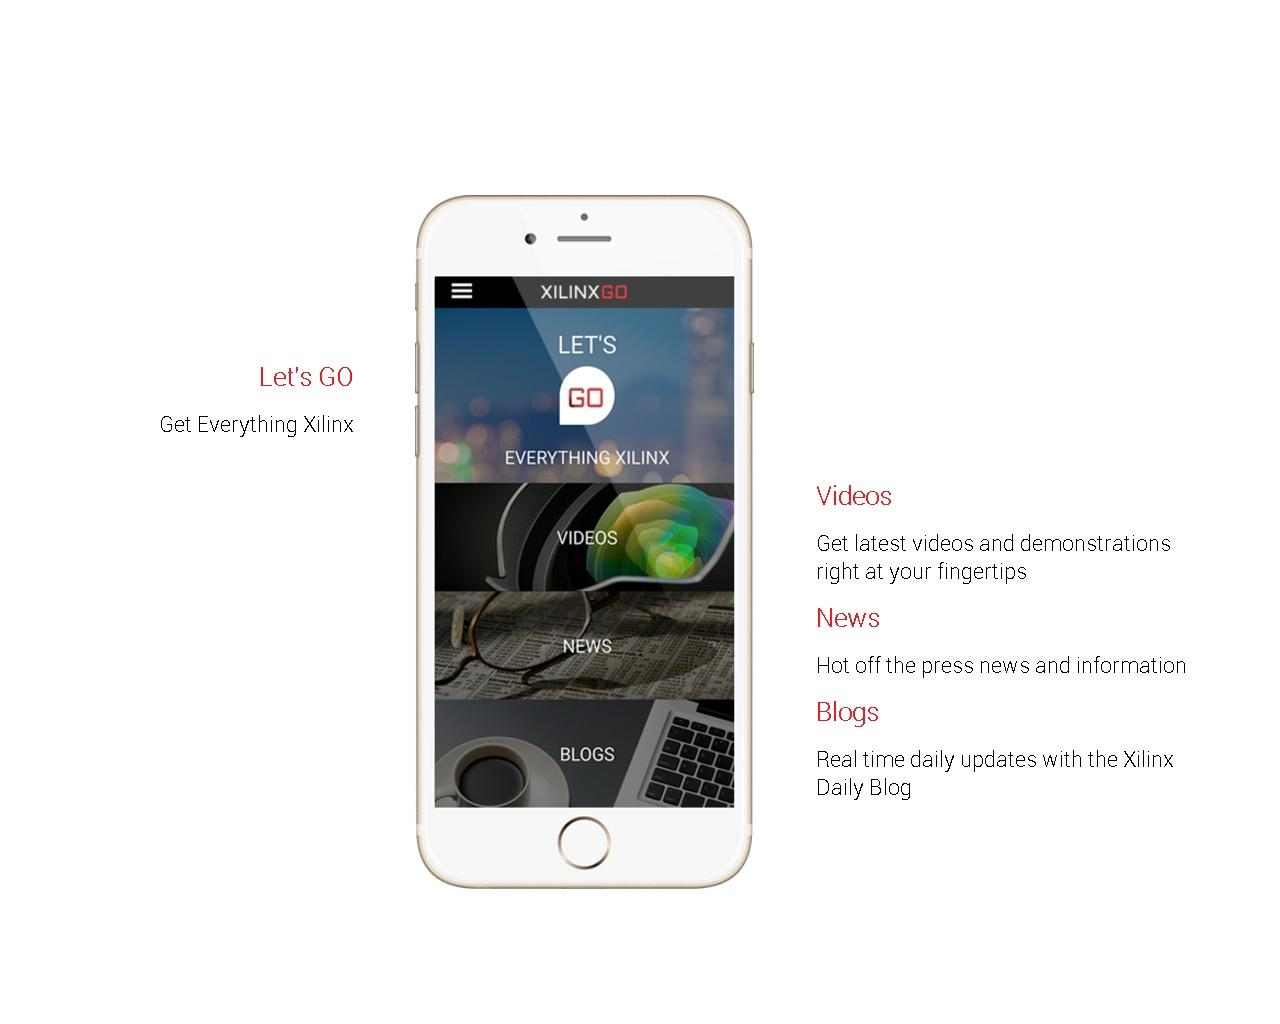

In [1]:
from time import sleep
from pyxi import OVERLAY
from pyxi.video import Frame, HDMI
from IPython.display import Image

OVERLAY().download_bitstream("audiovideo.bit")

hdmi=HDMI('in')
sleep(5) 
hdmi.start()
sleep(5)

frame = hdmi.frame()
height = hdmi.frame_height()
width = hdmi.frame_width()

orig_img_path = '/home/xpp/jupyter_notebooks/orig.jpg'
frame.save_as_jpeg(orig_img_path)
Image(filename=orig_img_path)

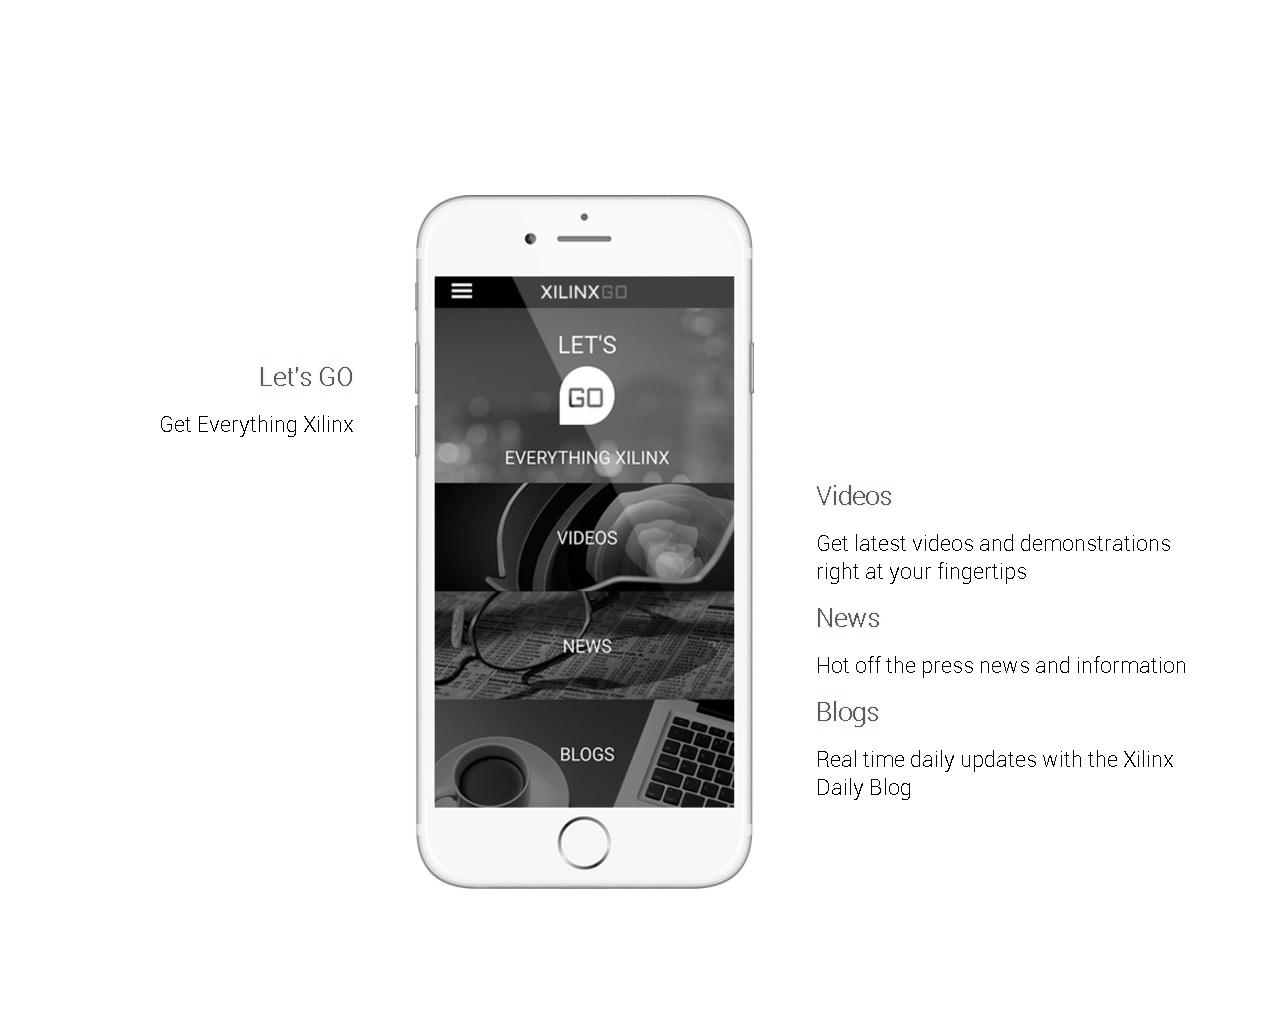

In [2]:
for y in range(0, height):
    for x in range(0, width):
        gray = round((0.299*frame[x,y][0]) + (0.587*frame[x,y][1]) 
                      + (0.114*frame[x,y][2]))
        frame[x,y] = (gray, gray, gray)

gray_img_path = '/home/xpp/jupyter_notebooks/gray.jpg'
frame.save_as_jpeg(gray_img_path)
Image(filename=gray_img_path)

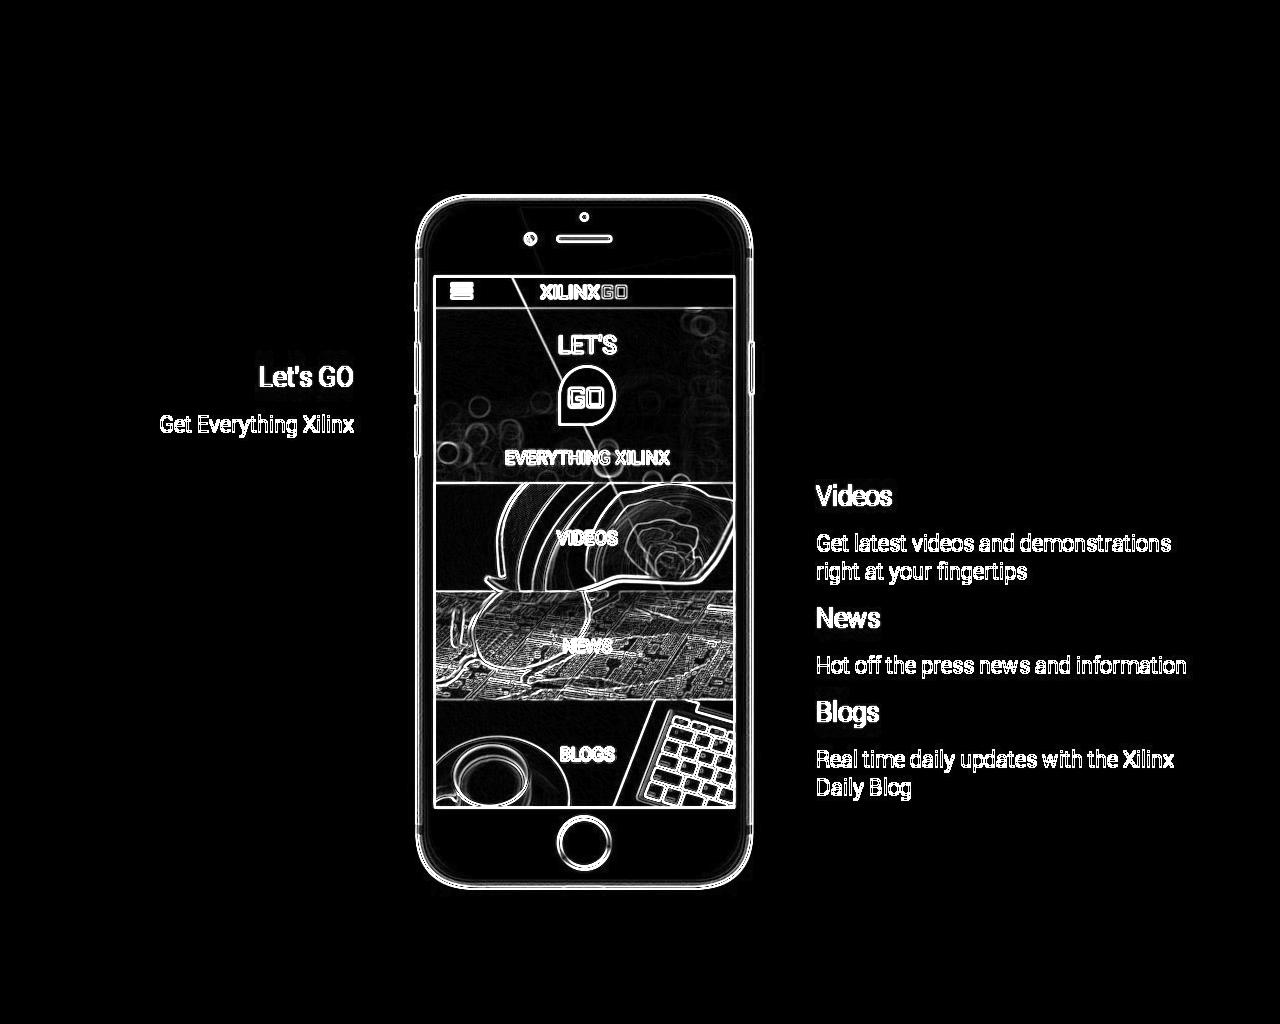

In [3]:
#Compute the Sobel Filter output
#Gx = -1 0 +1     Gy= +1 +2 +1
#     -2 0 +2          0  0  0
#     -1 0 +1         -1 -2 -1

sobel = Frame(width, height)

for y in range(1,height-1):
    for x in range(1,width-1):
        gx = abs(-frame[x-1,y+1][0] + frame[x+1,y+1][0] -2*frame[x-1,y][0] +2*frame[x+1,y][0] 
                 -frame[x-1,y-1][0] + frame[x+1,y-1][0])
        gy = abs(frame[x-1,y+1][0] + 2*frame[x,y+1][0] + frame[x+1,y+1][0] -frame[x-1,y-1][0]
                 -2*frame[x,y-1][0] - frame[x+1,y-1][0])
        grad = gx + gy
        if grad > 255:
            grad = 255                    
        sobel[x,y] = (grad,grad,grad)
        
sobel_img_path = '/home/xpp/jupyter_notebooks/sobel.jpg'
sobel.save_as_jpeg(sobel_img_path)

del frame # be clean - release memory
del sobel # be clean - release memory
del hdmi  # be clean - release memory

Image(filename=sobel_img_path)